In [45]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import glob
import os

# Function to resize and flatten each color channel of an image
def resize_and_flatten_image(image, target_size=(64, 64)):
    resized_image = cv2.resize(image, target_size)
    flattened_channels = [resized_image[:, :, i].flatten() for i in range(3)]  # Flatten each color channel
    flattened_image = np.concatenate(flattened_channels)  # Concatenate the flattened channels
    return flattened_image

# Function to load and process colored images with resizing and labels
def process_colored_images_with_labels(image_paths, target_size=(64, 64)):
    data = []
    labels = []

    for label, class_path in enumerate(image_paths):
        class_name = os.path.basename(class_path)
        class_images = glob.glob(os.path.join(class_path, '*.[jJpP]*[gG]'))

        for path in class_images:
            image = cv2.imread(path)  # Read the colored image
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
            flattened_image = resize_and_flatten_image(image, target_size)
            data.append(flattened_image)
            labels.append(class_name)

    return np.array(data), np.array(labels)

# Specify the directory where your images are stored (each subdirectory corresponds to a class)
base_directory = "C:\\Users\\Administrator\\Desktop\\admin_ivana\\Machine Learning\\dataset\\train\\"

# Get the list of subdirectories (each subdirectory represents a different vegetable class)
class_directories = glob.glob(os.path.join(base_directory, '*'))

# Process images with resizing and labels
dataset, labels = process_colored_images_with_labels(class_directories)

# Scale the pixel values using MinMaxScaler
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

# Create a DataFrame with both features and labels
df = pd.DataFrame(np.column_stack([labels, dataset_scaled]), columns=['label'] + [f'pixel_{i}' for i in range(len(dataset_scaled[0]))])

# Save DataFrame as CSV
df.to_csv("vegetable_dataset_final.csv", index=False)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler



In [5]:
vegetables_df = pd.read_csv('./vegetable_dataset_final.csv')

In [6]:
vegetables_df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287
0,apple,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.996078,...,0.980392,0.972549,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157
1,apple,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,apple,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,apple,1.000000,1.000000,0.984314,0.964706,0.988235,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.972549,0.988235
4,apple,0.050980,0.058824,0.058824,0.094118,0.768627,0.050980,0.062745,0.019608,0.082353,...,0.498039,0.427451,0.466667,0.400000,0.494118,0.376471,0.313725,0.274510,0.231373,0.203922


In [7]:
vegetables_df.shape

(3631, 12289)

In [8]:
vegetables_df = vegetables_df.sample(frac=1).reset_index(drop=True)

vegetables_df.shape

(3631, 12289)

In [9]:
vegetables_df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287
0,orange,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,beetroot,0.960784,0.964706,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.501961,0.560784,0.513725,0.564706,0.509804,0.588235,0.647059,0.643137,0.615686,0.600000
2,lemon,0.996078,0.996078,1.00000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.015686,0.007843,0.003922,0.000000,0.000000,0.003922,0.023529,0.000000,0.000000,0.007843
3,tomato,0.074510,0.062745,0.05098,0.047059,0.047059,0.047059,0.047059,0.043137,0.043137,...,0.682353,0.709804,0.737255,0.737255,0.639216,0.729412,0.764706,0.807843,0.874510,0.913725
4,pear,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
LOOKUP={'apple':0,
'banana':1,
'beetroot':2,
'cabbage':3,
'capsicum':4,
'carrot':5,
'cucumber':6,
'grapes':7,
'kiwi':8,
'lemon':9,
'lettuce':10,
'mango':11,
'onion':12,
'orange':13,
'pear':14,
'pineapple':15,
'pomegranate':16,
'potato':17,
'raddish':18,
'tomato':19,
'watermelon':20}

In [11]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [12]:
vegetables_df.columns[1:]

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_12278', 'pixel_12279', 'pixel_12280', 'pixel_12281',
       'pixel_12282', 'pixel_12283', 'pixel_12284', 'pixel_12285',
       'pixel_12286', 'pixel_12287'],
      dtype='object', length=12288)

In [13]:
X = vegetables_df[vegetables_df.columns[1:]]

Y = vegetables_df['label']

In [14]:
X.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.960784,0.964706,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.917647,...,0.501961,0.560784,0.513725,0.564706,0.509804,0.588235,0.647059,0.643137,0.615686,0.600000
2,0.996078,0.996078,1.00000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.015686,0.007843,0.003922,0.000000,0.000000,0.003922,0.023529,0.000000,0.000000,0.007843
3,0.074510,0.062745,0.05098,0.047059,0.047059,0.047059,0.047059,0.043137,0.043137,0.039216,...,0.682353,0.709804,0.737255,0.737255,0.639216,0.729412,0.764706,0.807843,0.874510,0.913725
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
Y.head()

0      orange
1    beetroot
2       lemon
3      tomato
4        pear
Name: label, dtype: object

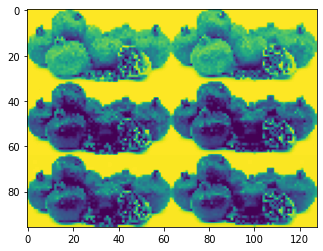

In [16]:
plt.imshow(X.loc[5].values.reshape(96,128))

In [17]:
Y.loc[5]

'pomegranate'

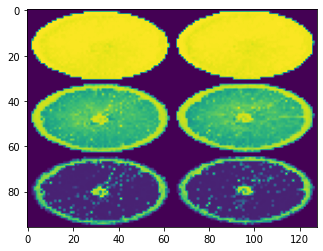

In [18]:
plt.imshow(X.loc[0].values.reshape(96,128))

In [19]:
Y.loc[0]

'orange'

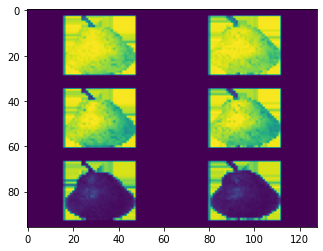

In [20]:
plt.imshow(X.loc[4].values.reshape(96,128))

In [21]:
Y.loc[4]

'pear'

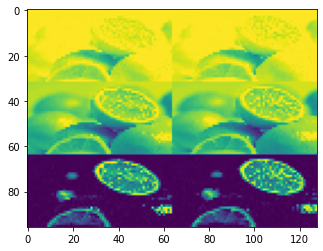

In [22]:
plt.imshow(X.loc[2].values.reshape(96,128))

In [23]:
Y.loc[2]

'lemon'

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
x_train.shape, y_train.shape

((2904, 12288), (2904,))

In [26]:
x_test.shape, y_test.shape

((727, 12288), (727,))

In [27]:
def summarize_classification(y_test, 
                             y_pred, 
                             avg_method='weighted'):
    
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

In [73]:
# Scale the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train your logistic regression model
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=5000,penalty='l2', C=1.0)
logistic_model.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=5000, solver='sag')

In [74]:
y_pred = logistic_model.predict(x_test_scaled)

y_pred

array(['pineapple', 'lettuce', 'banana', 'apple', 'kiwi', 'potato',
       'tomato', 'apple', 'capsicum', 'pineapple', 'lemon', 'tomato',
       'tomato', 'mango', 'grapes', 'pineapple', 'tomato', 'capsicum',
       'pineapple', 'tomato', 'potato', 'onion', 'orange', 'grapes',
       'pear', 'tomato', 'lemon', 'lettuce', 'pineapple', 'lemon',
       'apple', 'pomegranate', 'onion', 'lemon', 'potato', 'banana',
       'cucumber', 'pineapple', 'lettuce', 'raddish', 'pineapple', 'kiwi',
       'carrot', 'capsicum', 'carrot', 'pomegranate', 'raddish',
       'cucumber', 'banana', 'onion', 'beetroot', 'apple', 'kiwi',
       'lemon', 'tomato', 'kiwi', 'banana', 'banana', 'watermelon',
       'lemon', 'raddish', 'mango', 'banana', 'banana', 'tomato',
       'lettuce', 'pear', 'cabbage', 'watermelon', 'raddish', 'carrot',
       'onion', 'carrot', 'pineapple', 'carrot', 'orange', 'watermelon',
       'pomegranate', 'apple', 'banana', 'carrot', 'capsicum', 'cabbage',
       'orange', 'capsicum

In [75]:
summarize_classification(y_test, y_pred)

Test data count:  727
accuracy_count :  328.0
accuracy_score :  0.4511691884456671
precision_score :  0.4605313363161184
recall_score :  0.4511691884456671


In [28]:
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(solver='sag', multi_class='auto', max_iter=5000, penalty='l2'), param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
best_params = grid_search.best_params_
